# 서울시 공유자전거 이용 데이터 EDA(탐색적 데이터 분석)
- [데이터 출처](https://dacon.io/competitions/open/235576/data)

In [ ]:
# 나눔폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

- 데이터 로드. 오늘은 train 데이터만 이용합니다.

In [2]:
data = pd.read_csv('data/train.csv', index_col=0)
data.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,,,,,,,,,,
3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


### 데이터는 따릉이 대여 1시간 전의 기상상황과, 대여된 따릉이 갯수를 담고 있습니다.
아래는 데이콘에서 가져온 각 열의 설명입니다.

- id : 날짜와 시간별 id
- hour_bef_temperature : 1시간 전 기온
- hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
- hour_bef_windspeed : 1시간 전 풍속(평균)
- hour_bef_humidity : 1시간 전 습도
- hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- hour_bef_ozone : 1시간 전 오존
- hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count : 시간에 따른 따릉이 대여 수

### 데이터의 크기와 상태를 확인해보겠습니다.

편의를 위해 컬럼명을 한국어로 바꿔주겠습니다.

In [3]:
data.columns = ['시간', '기온', '강수여부', '풍속', '습도', '시정', '오존', '미세먼지', '초미세먼지', '대여 수']

In [4]:
print(data.shape)
data.info()

(1459, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 3 to 2179
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시간      1459 non-null   int64  
 1   기온      1457 non-null   float64
 2   강수여부    1457 non-null   float64
 3   풍속      1450 non-null   float64
 4   습도      1457 non-null   float64
 5   시정      1457 non-null   float64
 6   오존      1383 non-null   float64
 7   미세먼지    1369 non-null   float64
 8   초미세먼지   1342 non-null   float64
 9   대여 수    1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 125.4 KB


### 총 1459개의 데이터가 있으며, 10개의 특성이 있습니다.
### 결측치가 있는 데이터가 몇개 보입니다.

결측치를 채우기 앞서, 이 데이터로 알아내고자 하는 사실인 대여 수에 큰 영향을 끼치는 변수가 뭔지 알아봅시다.

In [5]:
cleaned_data = data.dropna()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 3 to 2179
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시간      1328 non-null   int64  
 1   기온      1328 non-null   float64
 2   강수여부    1328 non-null   float64
 3   풍속      1328 non-null   float64
 4   습도      1328 non-null   float64
 5   시정      1328 non-null   float64
 6   오존      1328 non-null   float64
 7   미세먼지    1328 non-null   float64
 8   초미세먼지   1328 non-null   float64
 9   대여 수    1328 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


가장 보수적인 방법으로, 결측값이 하나라도 있는 데이터를 모두 지워버렸습니다. 대략 100개 정도 삭제되었네요.

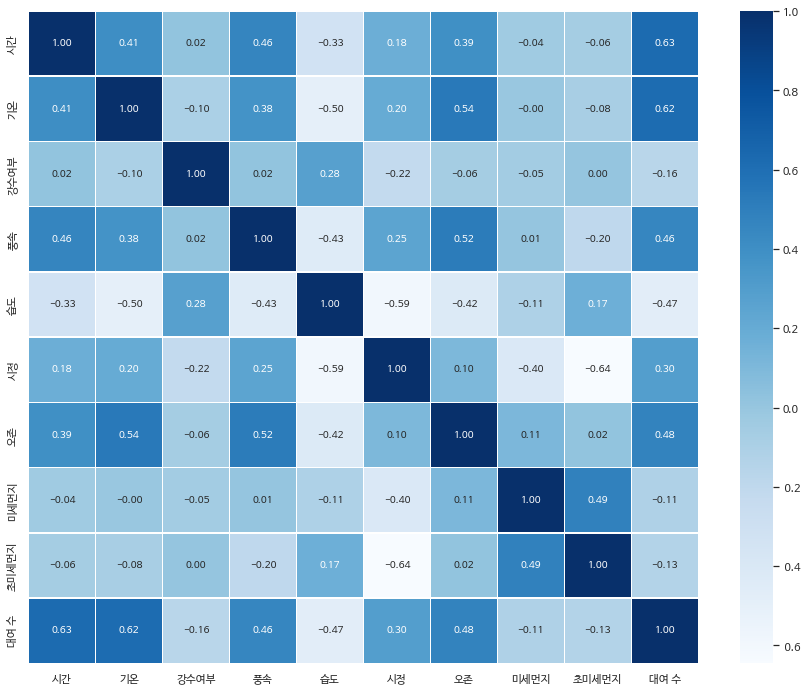

In [6]:
corr = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

각 특성들의 상관관계를 히트맵으로 나타내었습니다. 보톰 상관계수의 절댓값이 0.4 이상이면 상관관계를 갖는다고 봅니다.

- 의외로 강수여부와 대여 수의 상관관계가 크지 않습니다.
- 시간, 기온, 풍속이 상관관계가 꽤나 있어보입니다.
- 대부분 값이 상관계수가 낮게 나온 걸로 보아, 대여 수와 단순히 선형 상관관계를 갖는 특성이 많지는 않은 것 같습니다.

상관계수가 낮은 특성들을 대충 처리하려던 제 계획이 무너졌습니다.    
이렇게 된 이상, 그냥 결측치는 버리고 진행하도록 하겠습니다.

In [7]:
data = cleaned_data #에잇

데이터의 통계적 분포를 살펴봅시다.

일단 판다스의 내장함수를 써보고, 시각화도 해보겠습니다.

In [8]:
data.describe()

,시간,기온,강수여부,풍속,습도,시정,오존,미세먼지,초미세먼지,대여 수
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,11.905120,16.866039,0.030120,2.489834,51.740964,1413.655120,0.039091,57.481175,30.382530,110.804970
std,6.746907,5.196544,0.170983,1.382797,20.167066,577.258705,0.019430,31.221062,14.740807,82.900629
min,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,6.000000,13.000000,0.000000,1.400000,36.000000,899.000000,0.026000,36.000000,20.000000,37.000000
50%,12.000000,16.800000,0.000000,2.400000,50.000000,1581.500000,0.038500,52.000000,26.000000,100.500000
75%,18.000000,20.200000,0.000000,3.400000,68.000000,1993.250000,0.052000,70.000000,37.000000,153.000000
max,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


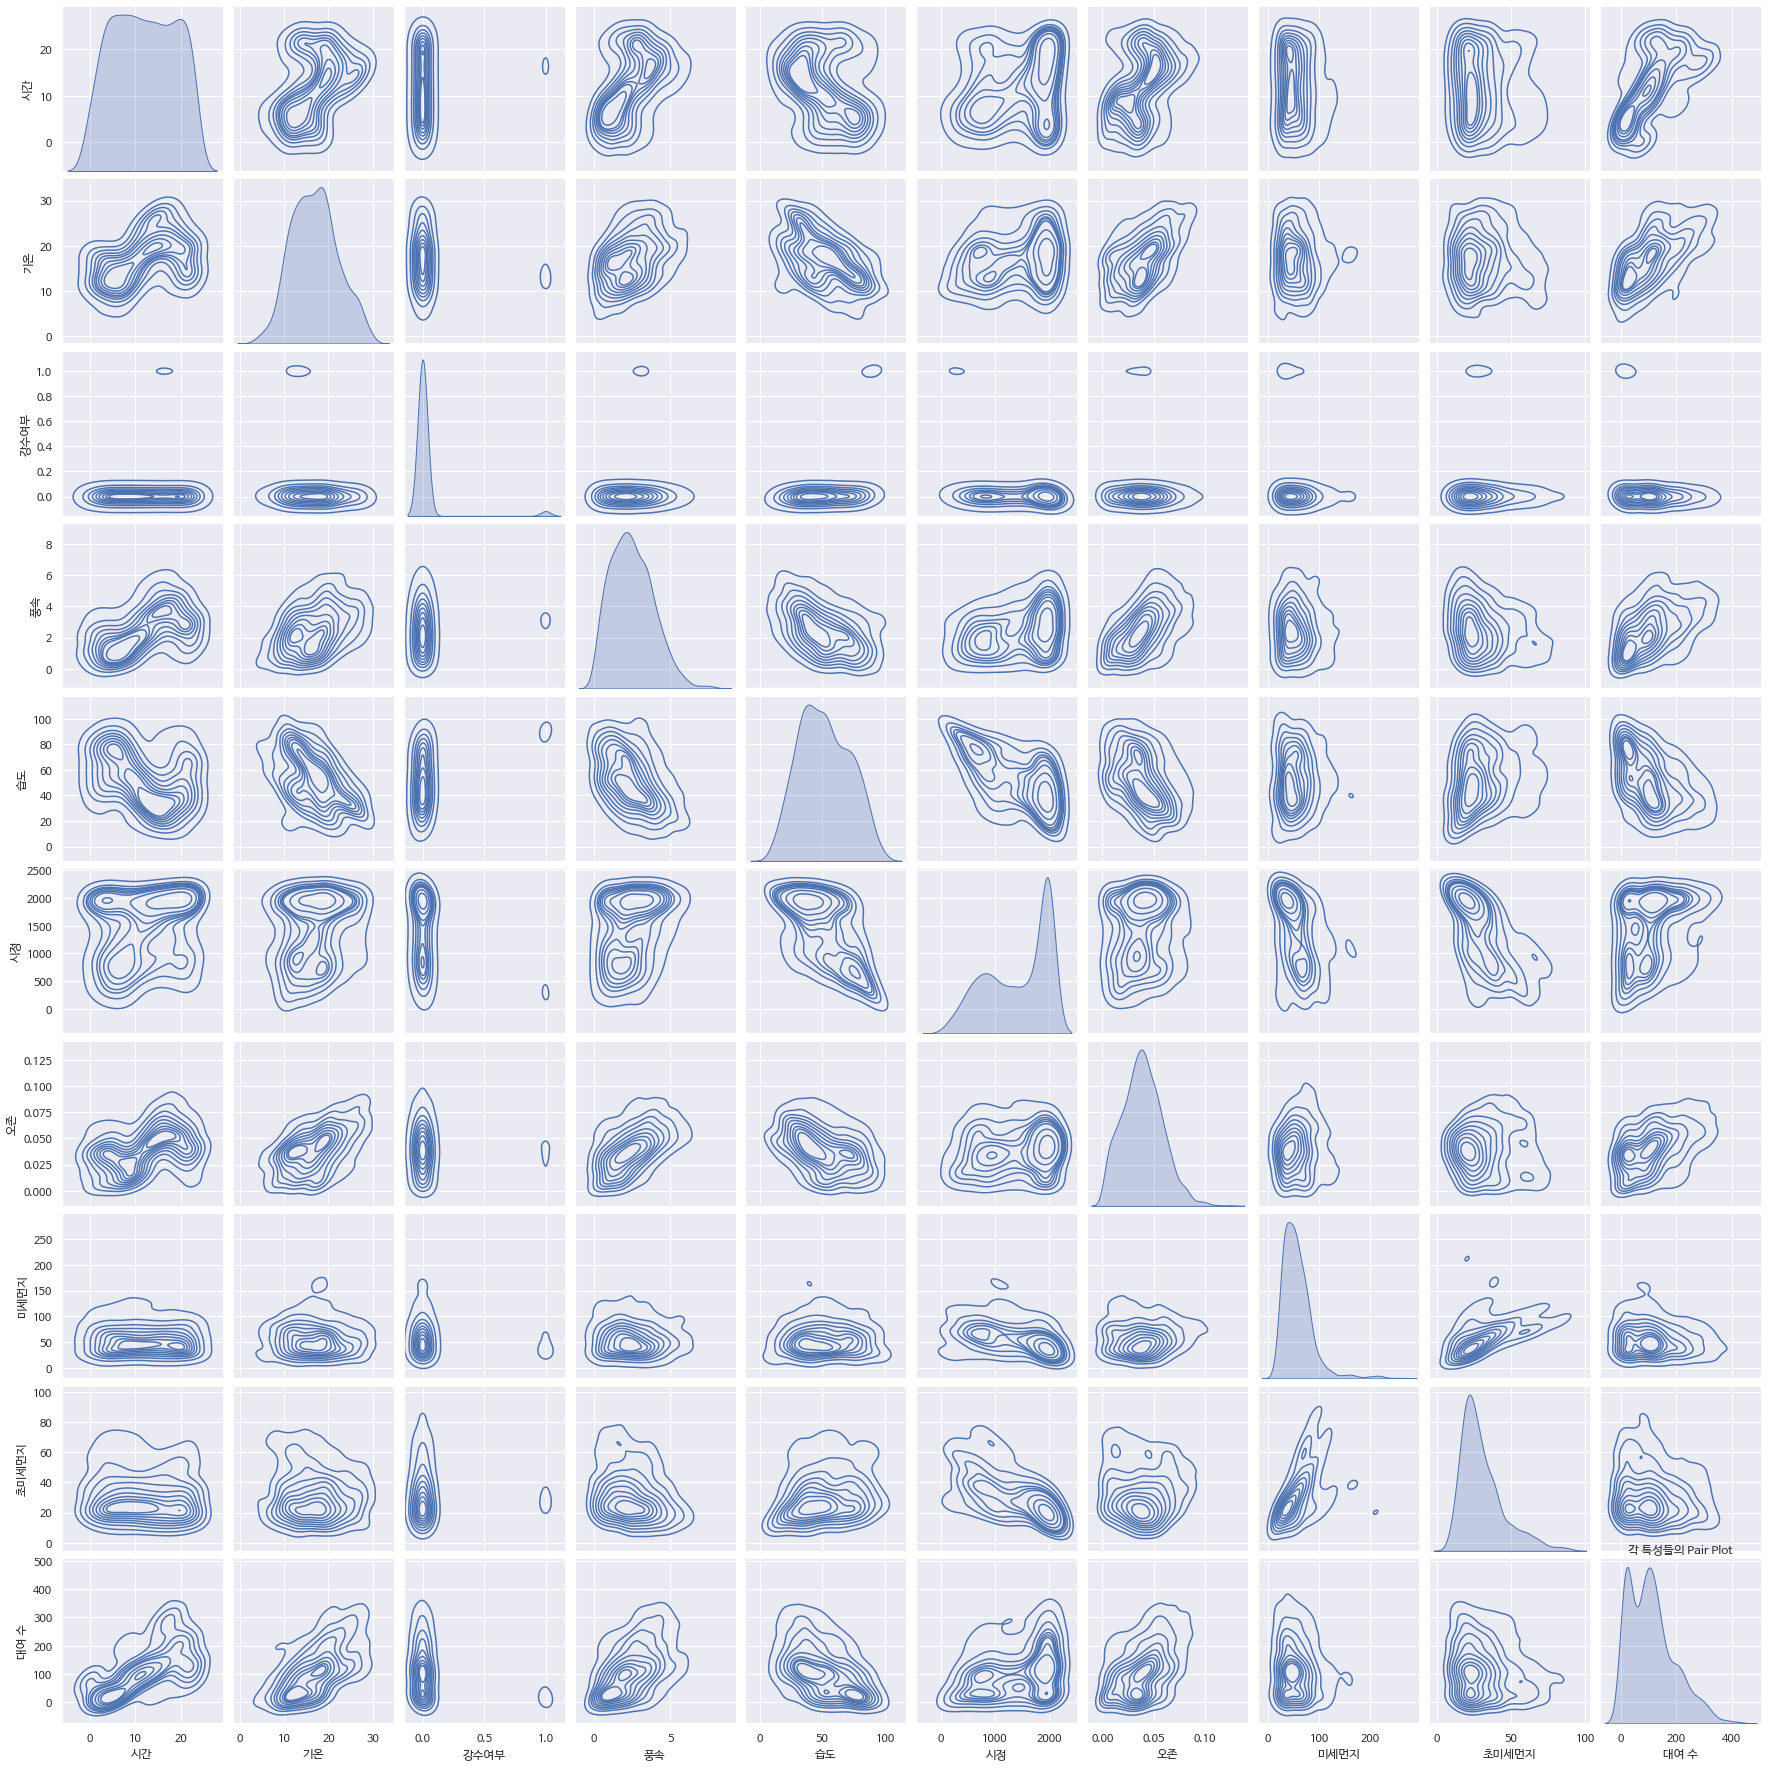

In [9]:
sns.pairplot(data, kind='kde') # Scatter 대신 밀도 히스토그램으로 그리기
plt.title("각 특성들의 Pair Plot")
plt.show()

차트 그려지는데 3분 걸렸습니다.. 다음부턴 필요한 컬럼만 뽑아서 합시다.    
암튼 데이터를 보아하니, 딱히 이상치는 없어보이고 분포도 고릅니다.

시험삼아 바로 랜덤 포레스트 모델을 만들어 학습시켜 보겠습니다.

In [12]:
x = data.drop('대여 수', axis=1)
y = data['대여 수']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777) # split x, y data into 80% of (train x, y), and 20% of (validation x, y)
print(x_train.shape)
print(x_test.shape)

(1062, 9)
(266, 9)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators=5, random_state=777)

rf.fit(x_train, y_train)

pred = rf.predict(x_test)

print("테스트 세트 RMSE: {:.3f}".format(np.sqrt(mean_squared_error(pred, y_test))))

테스트 세트 RMSE: 42.565


랜덤 포레스트가 예측을 수행하는데 어떤 특성을 중요시하게 생각했는지 알아봅시다.

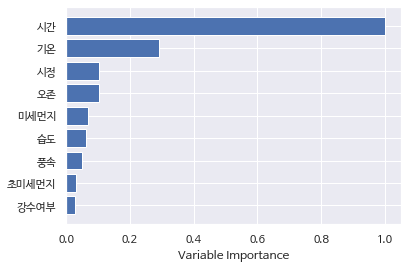

In [20]:
featureImportance = rf.feature_importances_

featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, data.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

따릉이 대여수 예측에 가장 중요하게 작용한 요소는 시간이었고, 의외로 강수여부는 크게 영향을 미치지 않았습니다.    
(제 생각에 강수 여부 데이터가 뭔가 잘못 된 것 같기도 합니다.)

랜덤 포레스트를 비롯한 트리 기반 모델의 장점은 알아서 결과에 중요한 변수를 찾아주고, 잘못되거나 중요하지 않은 데이터는 중요하게 생각하지 않는다는 점입니다.

오존 지수가 영향을 미친 것도 흥미롭습니다.

보통 오존을 신경쓰면서 자전거를 빌리지는 않을텐데, 아마 오존과 관련이 있는 다른 요소가 영향을 준 것 같습니다.

## 느낀 점 & 배운 점
사실 데이터 시각화에 중점을 두고 뭔가를 해본 것이 이번이 처음이라, 조금 아쉬운 부분이 있습니다.
기존에 머신러닝 하던 습관이 남아있어서 너무 결과에 치중한 것 같아 다음엔 더 흥미로운 관점을 찾아봐야겠습니다.

랜덤 포레스트의 Feature Importance는 이론만 알고 있고 들여다본건 처음인데, 다음부터는 더 활용할 방법을 생각해봐야겠습니다.